In [1]:
import pandas as pd
import numpy as np

# alpha_vantage

In [3]:
# ============================================================================
# Import intraday OHLCV data using alphavantage
# =============================================================================


# importing libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd


all_tickers = ["AAPL","MSFT","CSCO","AMZN"]
key_path = "/Users/manwaiwong/key/key.txt"

ts = TimeSeries(key=open(key_path,'r').read(), output_format='pandas')
data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')[0]
data.columns = ["open","high","low","close","volume"]

# extracting stock data (historical close price) for the stocks identified
close_prices = pd.DataFrame()
cp_tickers = all_tickers
attempt = 0
drop = []
while len(cp_tickers) != 0 and attempt <=5:
    print("-----------------")
    print("attempt number ",attempt)
    print("-----------------")
    cp_tickers = [j for j in cp_tickers if j not in drop]
    for i in range(len(cp_tickers)):
        try:
            ts = TimeSeries(key=open(key_path,'r').read(), output_format='pandas')
            data = ts.get_intraday(symbol=cp_tickers[i],interval='1min', outputsize='full')[0]
            data.columns = ["open","high","low","close","volume"]
            close_prices[cp_tickers[i]] = data["close"]
            drop.append(cp_tickers[i])       
        except:
            print(cp_tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

-----------------
attempt number  0
-----------------
-----------------
attempt number  1
-----------------


In [5]:
close_prices

,AAPL,MSFT,CSCO,AMZN
date,,,,
2020-02-07 09:50:00,321.5400,184.090,48.2650,2042.7600
2020-02-07 09:49:00,321.4473,183.840,48.2500,2045.3700
2020-02-07 09:48:00,321.4400,183.680,48.2100,2043.6810
2020-02-07 09:47:00,321.1200,183.520,48.2150,2043.7896
2020-02-07 09:46:00,321.0400,183.331,48.2366,2043.3700
...,...,...,...,...
2020-02-03 09:35:00,306.5000,170.930,46.2850,2032.7500
2020-02-03 09:34:00,305.6475,171.001,46.2350,2028.2500
2020-02-03 09:33:00,304.9200,171.060,46.2900,2025.8429


# YAHOO API

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c893090>,
      dtype=object)

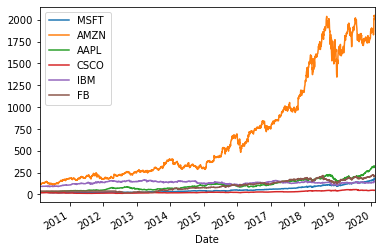

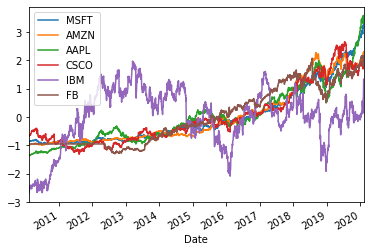

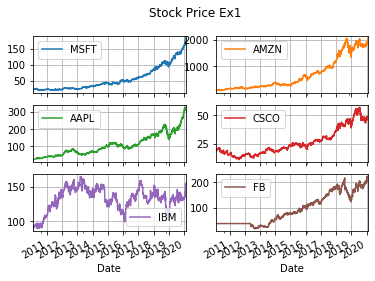

In [6]:
# =============================================================================
# Import OHLCV data and perform basic data operations
# Author : Mayank Rasu

# Please report bug/issues in the Q&A section
# =============================================================================

# Import necesary libraries
%matplotlib inline
import pandas as pd
import pandas_datareader.data as pdr
import datetime

# Download historical data for required stocks
tickers = ["MSFT","AMZN","AAPL","CSCO","IBM","FB"]

close_prices = pd.DataFrame() # dataframe to store close price of each ticker
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] # removing stocks whose data has been extracted from the ticker list
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(3650),datetime.date.today())
            temp.dropna(inplace = True)
            close_prices[tickers[i]] = temp["Adj Close"]
            drop.append(tickers[i])       
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1
    
# Handling NaN Values
close_prices.fillna(method='bfill',axis=0,inplace=True) # Replaces NaN values with the next valid value along the column
close_prices.dropna(how='any',axis=0,inplace=True) # Deletes any row where NaN value exists

# Mean, Median, Standard Deviation, daily return
close_prices.mean() # prints mean stock price for each stock
close_prices.median() # prints median stock price for each stock
close_prices.std() # prints standard deviation of stock price for each stock

daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock

daily_return.mean() # prints mean daily return for each stock
daily_return.std() # prints standard deviation of daily returns for each stock

# Rolling mean and standard deviation
rollmean = daily_return.rolling(window=20).mean() # simple moving average
daily_return.rolling(window=20).std()

exp_roll_mean = daily_return.ewm(span=20,min_periods=20).mean() # exponential moving average
daily_return.ewm(span=20,min_periods=20).std()

#Data Visulation
close_prices.plot()
cp_standardized = (close_prices - close_prices.mean())/close_prices.std()
cp_standardized.plot()

#subplot
close_prices.plot(subplots=True, layout = (3,2), title="Stock Price Ex1", grid=True, )

# QUANDL

In [8]:
f = open("/Users/manwaiwong/key/quandl.txt","r")

if f.mode == 'r':
    c = f.read() 
    #print(c)


'xJq8FoisxxJrjCcLsE4P'

In [11]:
# from pandas.io import data, wb # becomes
import os
import pandas_datareader.data as pdr
import datetime as dt
import requests_cache

# print(pdr.get_data_fred('GS10'))

# option 
ticker = "HKEX/00700"
# ticker = "HKEX/HSINX2019"
# ticker = "HKEX/00001"
# 
# ticker = "0001.hk"

expire_after = dt.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
start = dt.date.today() - dt.timedelta(10)
end = dt.date.today() 
qkey = c

quandl = pdr.DataReader(ticker, 'quandl', start, end, api_key=qkey, session=session)
# quandl['NominalPrice']

#ds = pdr.get_data_yahoo(ticker, start, end, session=session, interval="d")
print(quandl)

            NominalPrice  NetChange  Change    Bid    Ask  PEx   High    Low  \
Date                                                                           
2020-02-07         402.4        NaN     NaN  401.8  402.4  NaN  402.4  394.6   
2020-02-06         400.0        NaN     NaN  399.8  400.0  NaN  400.0  392.2   
2020-02-05         392.2        NaN     NaN  392.0  392.2  NaN  400.0  387.4   
2020-02-04         393.0        NaN     NaN  393.0  393.2  NaN  393.6  384.8   
2020-02-03         380.0        NaN     NaN  380.0  380.2  NaN  383.2  369.6   
2020-01-31         373.0        NaN     NaN  373.0  373.2  NaN  384.8  371.4   
2020-01-30         375.0        NaN     NaN  374.6  375.0  NaN  389.0  370.2   
2020-01-29         383.2        NaN     NaN  383.0  383.2  NaN  389.6  381.0   

            PreviousClose  ShareVolume000  Turnover000  LotSize  
Date                                                             
2020-02-07          400.0         14897.0    5941868.0      NaN  
2